# TA Semantic Function Distribution

In [1]:
from scripts.imports import *
import json

with open(paths['cl_clusters'], 'r') as infile:
    clclusts = json.load(infile)
    
out = Exporter(
    paths['outdir'],
    'semantics'
)

cc10_books = list(clclusts['10']['bookbounds'].keys())
cc10_bbounds = list(clclusts['10']['bookbounds'].values())


In [2]:
nt_clause_df = pd.read_csv(
    paths['clause_dataset'],
    index_col='node',
    low_memory=False
)

# bind clauses with time and without together
cl_df = pd.concat([df, nt_clause_df], 0)

In [3]:
def plot_distrib(df, ax=None, title='', **kwargs):
    """Plot distribution plot."""
    kws = {
        's': 4,
        'color': 'indigo',
    }
    kws.update(kwargs)
    if not ax:
        fig, ax = plt.subplots(figsize=(10, 3))
    sns.swarmplot(x=df.cl_clust10, ax=ax, **kws)
    ax.set_xticks(cc10_bbounds)
    ax.set_xticklabels(cc10_books, rotation=60)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.grid(axis='x')
    ax.set_axisbelow(True)

# All Time Distribution

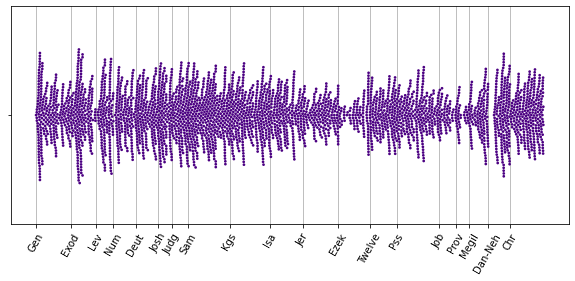

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))
plot_distrib(df, s=2.7, ax=ax) # all TAs
out.plot(
    'all_ta_distrib',
)

## All Time Genre

In [5]:
all_genre_ct = df.main_genre.value_counts()
all_genre_pr = all_genre_ct / all_genre_ct.sum()
all_genre_cp = join_ct_pr(all_genre_ct, all_genre_pr)

out.table(
    all_genre_cp,
    'all_genre_cp',
    caption='Genre Frequencies for All Time Adverbial Functions'
)

,count,percent
prose-Q,1058,31%
prose-N,996,29%
prophecy,588,17%
poetry,419,12%
instruction,322,10%


In [6]:
all_genre_ct = pivot_ct(
    cl_df,
    'has_time',
    'main_genre',
)

all_genre_ct = all_genre_ct.set_axis(['no', 'yes'], 0)
all_genre_ct.index.name = 'has time'

all_genre_pr = all_genre_ct.div(all_genre_ct.sum(1), 0)
all_genre_pc = all_genre_pr.mul(100).round().astype(int).astype(str)+'%'

out.table(
    all_genre_ct,
    'allcl_genre_ct',
    caption='Genre Counts by Presence of Time Adverbial in Clause'
)

main_genre,prose-N,prophecy,prose-Q,poetry,instruction
has time,,,,,
no,19312,19230,18524,13662,7224
yes,996,588,1058,419,322


In [7]:
out.table(
    all_genre_pc,
    'allcl_genre_pc',
    caption='Genre Percentages by Presence of Time Adverbial in Clause'
)

main_genre,prose-N,prophecy,prose-Q,poetry,instruction
has time,,,,,
no,25%,25%,24%,18%,9%
yes,29%,17%,31%,12%,10%


In [8]:
all_genre_fs, all_genre_odds = sig.apply_fishers(all_genre_ct, 0, 1, sign=False, logtransform=False)

In [9]:
all_genre_fs

,prose-N,prophecy,prose-Q,poetry,instruction
no,1.624890e-09,1.671910e-23,2.458731e-22,1.007365e-15,0.628142
yes,1.624890e-09,1.671910e-23,2.458731e-22,1.007365e-15,0.628142


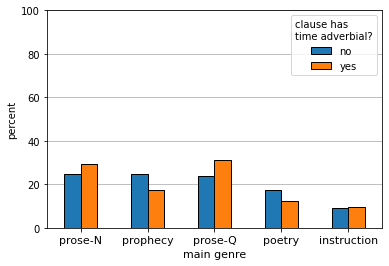

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
all_genre_pr.T.mul(100)\
    .rename_axis(columns='clause has\ntime adverbial?')\
    .plot(kind='bar', ax=ax, edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=11)
ax.set_ylim((0,100))
ax.set_xlabel('main genre', size=11)
ax.set_ylabel('percent')
ax.grid(axis='y')
ax.set_axisbelow(True)
out.plot(
    'bar_ALL_genre_pc'
)

In [11]:
out.number(
    all_genre_pr.loc['yes'][['prose-Q', 'prose-N']].sum()*100,
    'allg_prose_pc',
)

'61'

In [12]:
out.number(
    all_genre_pr.loc['yes']['prose-Q']*100,
    'allg_proseQ_pc',
)

'31'

## Simultaneous

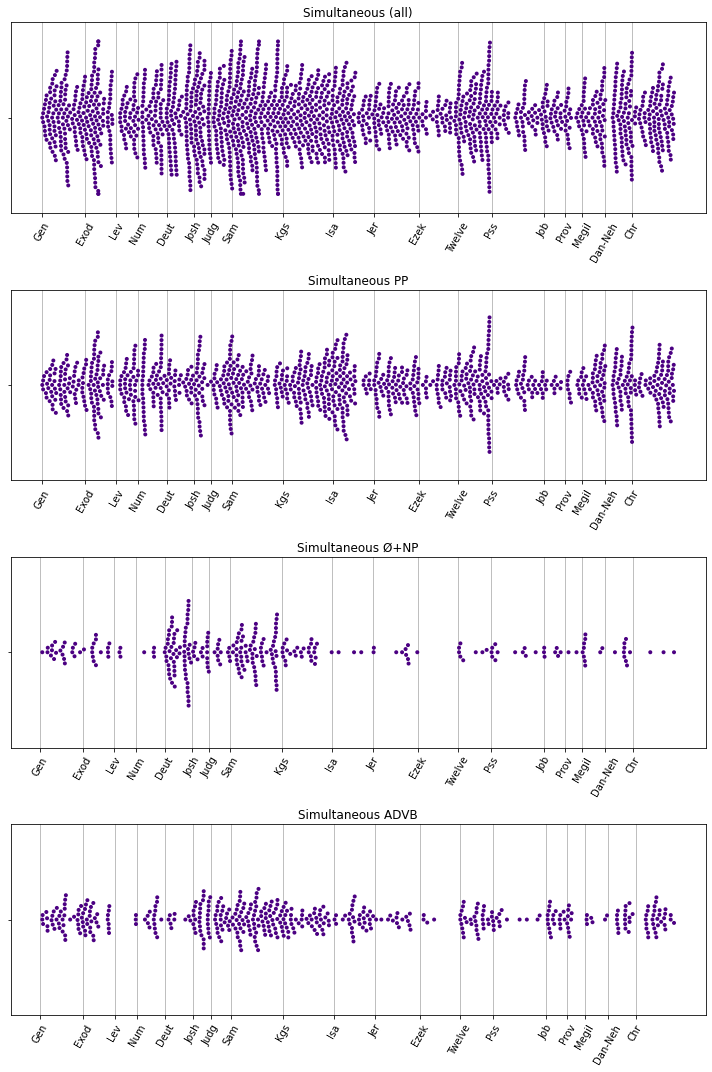

In [13]:
simul_df = df[df.function == 'simultaneous']
simprep = simul_df[
    (simul_df.is_advb == 0)
    & (simul_df.front != 'Ø')
]
simnull = simul_df[
    (simul_df.is_advb == 0)
    & (simul_df.front == 'Ø')
]
simadvb = simul_df[simul_df.is_advb == 1]

fig, axs = plt.subplots(4, 1, figsize=(10, 15))

title2data = {
    'Simultaneous (all)': simul_df,
    'Simultaneous PP': simprep,
    'Simultaneous Ø+NP': simnull,
    'Simultaneous ADVB': simadvb,
}

for title, ax in zip(title2data, axs.ravel()):
    data = title2data[title]
    plot_distrib(data, title=title, ax=ax)
    
fig.tight_layout()

out.plot(
    'distrib_simul',
)


In [14]:
simgenph_ct = pivot_ct(
    simul_df,
    'ph_type',
    'main_genre',
)
simgenph_pr = simgenph_ct.div(simgenph_ct.sum(1), 0)

simgenph_pc = simgenph_pr.mul(100).round().astype(int).astype(str) + '%'

out.table(
    simgenph_ct,
    'simgenph_ct',
    caption='Simultaneous Function Phrase Type Counts by Genre'
)

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
ph_type,,,,,
PP,185,384,244,103,107
ADVB,304,22,76,43,3
NP,213,37,17,18,7


In [15]:
out.table(
    simgenph_pc,
    'simgenph_pc',
    caption='Genre Share of Simultaneous Phrase Types'
)

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
ph_type,,,,,
PP,18%,38%,24%,10%,10%
ADVB,68%,5%,17%,10%,1%
NP,73%,13%,6%,6%,2%


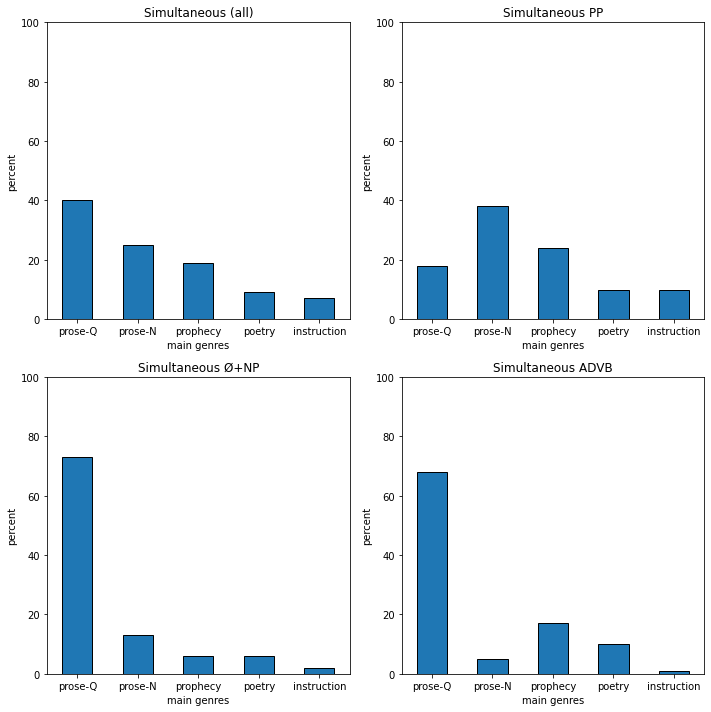

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs = axs.ravel()

for ax, title in zip(axs, title2data):
    data = title2data[title]
    genre_ct = data.main_genre.value_counts()
    genre_ct = genre_ct.loc[['prose-Q', 'prose-N', 'prophecy', 'poetry', 'instruction']] # normalize order
    genre_pr = genre_ct / genre_ct.sum()
    genre_pr.mul(100).round().astype(int).plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylabel('percent')
    ax.set_xlabel('main genres')
    ax.set_title(title)
    ax.set_ylim(0, 100)
fig.tight_layout()

out.plot(
    'bar_simgen_prs'
)

### Get Examples

I want to see what these clusters mean...

In [17]:
sp_cts = simprep.cl_clust10.value_counts()

sp_cts

2170    4
8062    4
1663    4
1549    4
6100    3
       ..
7588    1
683     1
2733    1
2735    1
3667    1
Name: cl_clust10, Length: 942, dtype: int64

In [18]:
ts.show(
    simprep[simprep.cl_clust10 == 1549]
)

showing 4 of 4


,verse,clause
node,,
443027,Num 19:12,ה֣וּא יִתְחַטָּא־בֹ֞ו בַּיֹּ֧ום הַשְּׁלִישִׁ֛י
443028,Num 19:12,וּבַיֹּ֥ום הַשְּׁבִיעִ֖י יִטְהָ֑ר
443029,Num 19:12,וְאִם־לֹ֨א יִתְחַטָּ֜א בַּיֹּ֧ום הַשְּׁלִישִׁ֛י
443030,Num 19:12,וּבַיֹּ֥ום הַשְּׁבִיעִ֖י לֹ֥א יִטְהָֽר׃


## Anterior

In [19]:
antdf = df[df.function == 'anterior']

antdf.shape

(32, 81)

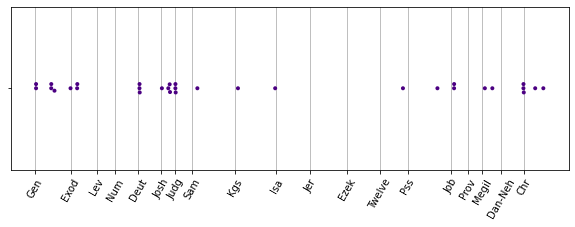

In [20]:
plot_distrib(antdf)
out.plot(
    'distrib_anterior'
)

In [21]:
antgenre_ct = pivot_ct(
    antdf,
    'front',
    'main_genre'
)

antgenre_pr = antgenre_ct.div(antgenre_ct.sum(1), 0)
antgenre_pc = antgenre_pr.mul(100).round().astype(int).astype(str)+'%'


out.table(
    antgenre_ct,
    'antgenre_ct',
    caption='Genre Counts by Anterior Type'
)


main_genre,prose-N,prose-Q,poetry,prophecy
front,,,,
לְ,13,4,2,0
לְ+פָּנֶה,1,4,2,1
טֶרֶם,3,1,0,0


In [22]:
out.table(
    antgenre_pc,
    'antgenre_pc',
    caption='Genre Percentage of Anterior Type'
)

main_genre,prose-N,prose-Q,poetry,prophecy
front,,,,
לְ,68%,21%,11%,0%
לְ+פָּנֶה,12%,50%,25%,12%
טֶרֶם,75%,25%,0%,0%


## Posterior

In [23]:
postdf = df[df.function == 'posterior']
postdf.shape

(224, 81)

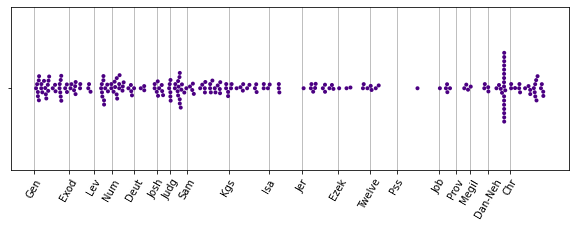

In [24]:
plot_distrib(postdf)
out.plot(
    'distrib_posterior'
)

In [25]:
ts.show(
    postdf[postdf.book == 'Nehemiah']
)

showing 17 of 17


,verse,clause
node,,
508758,Neh 3:16,אַחֲרָ֤יו הֶחֱזִיק֙ נְחֶמְיָ֣ה בֶן־עַזְבּ֔וּק שַׂ֕ר חֲצִ֖י פֶּ֣לֶךְ בֵּֽית־צ֑וּר עַד־נֶ֨גֶד֙ קִבְרֵ֣י דָוִ֔יד וְעַד־הַבְּרֵכָה֙ וְעַ֖ד בֵּ֥ית הַגִּבֹּרִֽים׃ ס
508760,Neh 3:17,אַחֲרָ֛יו הֶחֱזִ֥יקוּ הַלְוִיִּ֖ם רְח֣וּם בֶּן־בָּנִ֑י
508762,Neh 3:18,אַחֲרָיו֙ הֶחֱזִ֣יקוּ אֲחֵיהֶ֔ם בַּוַּ֖י בֶּן־חֵנָדָ֑ד שַׂ֕ר חֲצִ֖י פֶּ֥לֶךְ קְעִילָֽה׃ ס
508765,Neh 3:20,אַחֲרָ֨יו הֶחֱרָ֧ה
508767,Neh 3:21,אַחֲרָ֣יו הֶחֱזִ֗יק מְרֵמֹ֧ות בֶּן־אוּרִיָּ֛ה בֶּן־הַקֹּ֖וץ מִדָּ֣ה שֵׁנִ֑ית מִפֶּ֨תַח֙ בֵּ֣ית אֶלְיָשִׁ֔יב וְעַד־תַּכְלִ֖ית בֵּ֥ית אֶלְיָשִֽׁיב׃ ס
508768,Neh 3:22,וְאַחֲרָ֛יו הֶחֱזִ֥יקוּ הַכֹּהֲנִ֖ים אַנְשֵׁ֥י הַכִּכָּֽר׃
508769,Neh 3:23,אַחֲרָ֨יו הֶחֱזִ֧יק בִּנְיָמִ֛ן וְחַשּׁ֖וּב נֶ֣גֶד בֵּיתָ֑ם ס
508770,Neh 3:23,אַחֲרָ֣יו הֶחֱזִ֗יק עֲזַרְיָ֧ה בֶן־מַעֲשֵׂיָ֛ה בֶּן־עֲנָֽנְיָ֖ה אֵ֥צֶל בֵּיתֹֽו׃ ס
508771,Neh 3:24,אַחֲרָ֣יו הֶחֱזִ֗יק בִּנּ֛וּי בֶּן־חֵנָדָ֖ד מִדָּ֣ה שֵׁנִ֑ית מִבֵּ֣ית עֲזַרְיָ֔ה עַד־הַמִּקְצֹ֖ועַ וְעַד־הַפִּנָּֽה׃


## Anterior-Durative

In [26]:
antdurdf = df[df.function == 'anterior_dur']
antdurdf.shape

(449, 81)

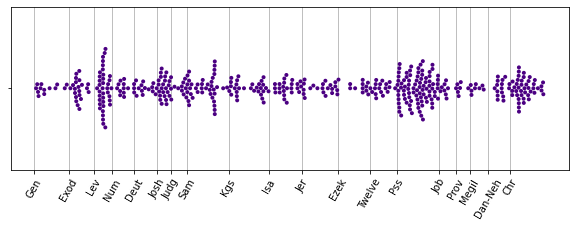

In [27]:
plot_distrib(antdurdf)
out.plot(
    'distrib_antdur'
)

In [28]:
antdur_bkct = antdurdf.booksuper.value_counts()
antdur_bkpr = antdur_bkct / antdur_bkct.sum()
antdur_bkpr

Psalms         0.198218
Chronicles     0.093541
Samuel         0.086860
Leviticus      0.084633
Kings          0.066815
Isaiah         0.053452
Joshua         0.051225
Exodus         0.046771
Jeremiah       0.046771
Twelve         0.040089
Deuteronomy    0.031180
Numbers        0.031180
Genesis        0.028953
Ezekiel        0.026726
Judges         0.026726
Ezra-Neh       0.020045
Job            0.017817
Megilloth      0.017817
Daniel         0.015590
Proverbs       0.015590
Name: booksuper, dtype: float64

In [29]:
out.number(
    antdur_bkpr['Psalms'] * 100,
    'antdur_Psalms_pc'
)

'20'

In [30]:
ts.show(
    antdurdf[antdurdf.booksuper == 'Chronicles']
)

showing 25 of 42


,verse,clause
node,,
510197,1 Chr 4:41,וַיַּחֲרִימֻם֙ עַד־הַיֹּ֣ום הַזֶּ֔ה
510265,1 Chr 5:26,וַ֠יְבִיאֵם לַחְלַ֨ח וְחָבֹ֤ור וְהָרָא֙ וּנְהַ֣ר גֹּוזָ֔ן עַ֖ד הַיֹּ֥ום הַזֶּֽה׃ פ
510899,1 Chr 12:30,וְעַד־הֵ֨נָּה֙ מַרְבִּיתָ֔ם שֹׁמְרִ֕ים מִשְׁמֶ֖רֶת בֵּ֥ית שָׁאֽוּל׃ ס
511046,1 Chr 15:2,וּֽלְשָׁרְתֹ֖ו עַד־עֹולָֽם׃ ס
511156,1 Chr 16:15,זִכְר֤וּ לְעֹולָם֙ בְּרִיתֹ֔ו
511305,1 Chr 17:14,וְהַֽעֲמַדְתִּ֛יהוּ בְּבֵיתִ֥י וּבְמַלְכוּתִ֖י עַד־הָעֹולָ֑ם
511336,1 Chr 17:22,וַ֠תִּתֵּן אֶת־עַמְּךָ֙ יִשְׂרָאֵ֧ל׀ לְךָ֛ לְעָ֖ם עַד־עֹולָ֑ם
511341,1 Chr 17:23,הַדָּבָ֗ר יֵאָמֵ֖ן עַד־עֹולָ֑ם
511362,1 Chr 17:27,לִהְיֹ֥ות לְעֹולָ֖ם לְפָנֶ֑יךָ


In [31]:
ts.show(
    antdurdf[antdurdf.booksuper == 'Leviticus']
, spread=10)

showing 10 of 38


,verse,clause
node,,
438414,Lev 7:15,לֹֽא־יַנִּ֥יחַ מִמֶּ֖נּוּ עַד־בֹּֽקֶר׃
438859,Lev 11:31,כָּל־יִטְמָ֥א עַד־הָעָֽרֶב׃
438900,Lev 11:40,וְטָמֵ֥א עַד־הָעָֽרֶב׃
439414,Lev 15:7,וְטָמֵ֥א עַד־הָעָֽרֶב׃
439433,Lev 15:11,וְטָמֵ֥א עַד־הָעָֽרֶב׃
439465,Lev 15:19,וְכָל־יִטְמָ֥א עַד־הָעָֽרֶב׃
439503,Lev 15:27,וְטָמֵ֥א עַד־הָעָֽרֶב׃
440175,Lev 22:6,וְטָמְאָ֖ה עַד־הָעָ֑רֶב
440559,Lev 25:28,וְהָיָ֣ה מִמְכָּרֹ֗ו בְּיַד֙ עַ֖ד שְׁנַ֣ת הַיֹּובֵ֑ל


In [32]:
antdur_gen_ct = pivot_ct(
    antdurdf,
    'front',
    'main_genre'
)

antdur_gen_pr = antdur_gen_ct.div(antdur_gen_ct.sum(1), 0)
antdur_gen_pc = antdur_gen_pr.mul(100).round().astype(int).astype(str) + '%'

out.table(
    antdur_gen_ct,
    'antdur_gen_ct',
    caption='Anterior Durative Genre Counts by Fronted Element'
)

main_genre,poetry,prose-Q,prose-N,prophecy,instruction
front,,,,,
עַד,28,82,84,34,51
לְ,83,27,0,35,4
עַד+לְ,0,2,0,0,0


In [33]:
out.table(
        antdur_gen_pc,
        'antdur_gen_pc',
        caption='Anterior Durative Genre Percentages by Fronted Element'
)

main_genre,poetry,prose-Q,prose-N,prophecy,instruction
front,,,,,
עַד,10%,29%,30%,12%,18%
לְ,56%,18%,0%,23%,3%
עַד+לְ,0%,100%,0%,0%,0%


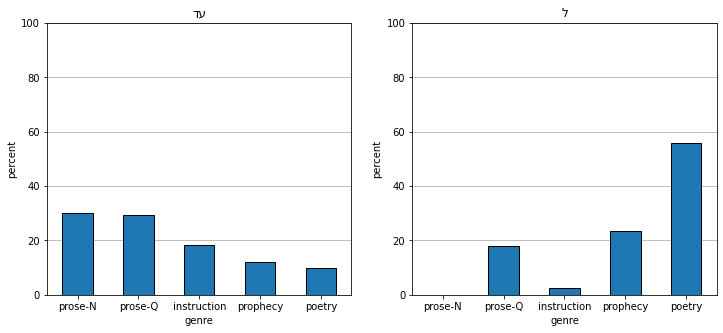

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

order = antdur_gen_pr.loc['עַד'].sort_values(ascending=False).index

for ax, front in zip(axs.ravel(), ['עַד', 'לְ']):
    data = antdur_gen_pr.loc[front][order].mul(100)
    title = get_display(f'Anterior Durative with {front}')
    data.plot(kind='bar', ax=ax, title=title, edgecolor='black')
    ax.set_ylabel('percent')
    ax.set_xlabel('genre')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(axis='y')
    ax.set_axisbelow(True)
    ax.set_ylim(0, 100)
    out.plot(
        'bar_antdur_genre'
    )

## Posterior-Durative

In [36]:
postdurdf = df[df.function == 'posterior_dur']
postdurdf.shape

(67, 81)

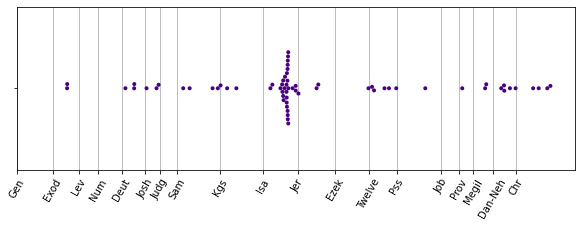

In [37]:
plot_distrib(postdurdf)
out.plot(
    'distrib_postdur'
)

In [40]:
postdur_isa = postdurdf[postdurdf.book == 'Isaiah']
out.examples(
    postdur_isa,
    'postdur_Isa_exs'
, spread=5)

exporting 5 of 30...


,verse,clause
node,,
469373,Isa 16:13,אֲשֶׁ֨ר דִּבֶּ֧ר יְהוָ֛ה אֶל־מֹואָ֖ב מֵאָֽז׃
471677,Isa 43:13,גַּם־מִיֹּום֙ אֲנִ֣י ה֔וּא
472086,Isa 46:10,וּמִקֶּ֖דֶם
472234,Isa 48:8,וּמִבֶּ֖טֶן קֹ֥רָא לָֽךְ׃
473539,Isa 64:3,וּמֵעֹולָ֥ם לֹא־שָׁמְע֖וּ


In [41]:
get_verserefs(postdur_isa.verse)

'Isa 16:13; 22:11; 37:26; 40:21; 41:4, 26; 42:14; 43:13; 44:8; 45:21; 46:3, 10; 47:12, 15; 48:3, 5-6, 8, 16; 49:1, 5; 57:11; 63:19; 64:3'

In [45]:
out.examples(
    postdurdf[
        (postdurdf.main_genre == 'instruction')
    ],
    'postdur_instr_exs'
, spread=3)

exporting 3 of 5...


,verse,clause
node,,
435870,Exod 21:29,וְאִ֡ם שֹׁור֩ נַגָּ֨ח ה֜וּא מִתְּמֹ֣ל שִׁלְשֹׁ֗ם
446923,Deut 19:4,וְה֛וּא לֹא־שֹׂנֵ֥א לֹ֖ו מִתְּמֹ֥ל שִׁלְשֹֽׁם׃
485535,Ezek 48:35,וְשֵׁם־הָעִ֥יר מִיֹּ֖ום


In [37]:
postdur_gen_ct = postdurdf.main_genre.value_counts()
postdur_gen_pr = postdur_gen_ct / postdur_gen_ct.sum()
postdur_gen_cp = join_ct_pr(postdur_gen_ct, postdur_gen_pr)

out.table(
    postdur_gen_cp,
    'postdur_gen_cp',
    caption='Genre Counts for Posterior Durative',
)

,count,percent
prophecy,38,58%
prose-Q,13,20%
prose-N,7,11%
instruction,5,8%
poetry,3,5%


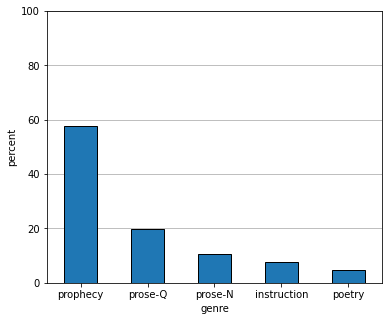

In [38]:
fig, ax = plt.subplots(figsize=(6, 5))

data = postdur_gen_pr.mul(100)
data.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
out.plot(
    'bar_postdur_genre'
)

## Distance future/past

In [39]:
distdf = df[
    (df.function == 'dist_past')
    | (df.function == 'dist_fut')
]
distdf.shape

(10, 81)

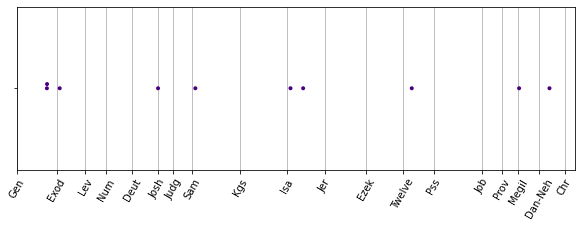

In [40]:
plot_distrib(distdf)

out.plot(
    'distrib_dist'
)

In [41]:
distgen_ct = distdf.main_genre.value_counts()

distgen_ct

prose-Q     7
prophecy    3
Name: main_genre, dtype: int64

In [42]:
out.number(
    distdf.shape[0],
    'N_distpastfut'
)

'10'

In [43]:
out.number(
    distgen_ct['prose-Q'],
    'dist_proseQ_N'
)

'7'

In [44]:
ts.show(

df[
    (
        (df.function == 'dist_past')
       | (df.function == 'dist_fut')
    )
    & (df.main_genre == 'prophecy')
]
)

showing 3 of 3


,verse,clause
node,,
468659,Isaiah 7:8,וּבְעֹ֗וד שִׁשִּׁ֤ים וְחָמֵשׁ֙ שָׁנָ֔ה יֵחַ֥ת אֶפְרַ֖יִם מֵעָֽם׃
470561,Isaiah 32:10,יָמִים֙ עַל־שָׁנָ֔ה תִּרְגַּ֖זְנָה
486871,Amos 4:7,וְגַ֣ם אָנֹכִי֩ מָנַ֨עְתִּי מִכֶּ֜ם אֶת־הַגֶּ֗שֶׁם בְּעֹ֨וד שְׁלֹשָׁ֤ה חֳדָשִׁים֙ לַקָּצִ֔יר


## Regular Recurrence

In [45]:
regrec = df[
    (df.function == 'reg_recur')
]
regrec.shape

(80, 81)

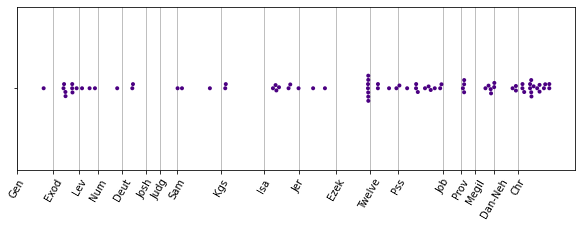

In [46]:
plot_distrib(regrec)

out.plot(
    'distrib_regrec'
)

In [47]:
ts.show(
    regrec[regrec.booksuper == 'Ezekiel']
, spread=30)

showing 7 of 7


,verse,clause
node,,
485216,Ezekiel 45:23,וְחַטָּ֕את שְׂעִ֥יר עִזִּ֖ים לַיֹּֽום׃
485231,Ezekiel 46:3,וְהִשְׁתַּחֲו֣וּ עַם־הָאָ֗רֶץ פֶּ֚תַח הַשַּׁ֣עַר הַה֔וּא בַּשַּׁבָּתֹ֖ות וּבֶחֳדָשִׁ֑ים לִפְנֵ֖י יְהוָֽה׃
485258,Ezekiel 46:11,וּבַחַגִּ֣ים וּבַמֹּועֲדִ֗ים תִּהְיֶ֤ה הַמִּנְחָה֙ אֵיפָ֤ה לַפָּר֙ וְאֵיפָ֣ה לָאַ֔יִל
485269,Ezekiel 46:13,וְכֶ֨בֶשׂ בֶּן־שְׁנָתֹ֜ו תָּמִ֗ים תַּעֲשֶׂ֥ה עֹולָ֛ה לַיֹּ֖ום לַֽיהֹוָ֑ה
485270,Ezekiel 46:13,בַּבֹּ֥קֶר בַּבֹּ֖קֶר תַּעֲשֶׂ֥ה אֹתֹֽו׃
485271,Ezekiel 46:14,וּמִנְחָה֩ תַעֲשֶׂ֨ה עָלָ֜יו בַּבֹּ֤קֶר בַּבֹּ֨קֶר֙ שִׁשִּׁ֣ית הָֽאֵיפָ֔ה
485276,Ezekiel 46:15,יַעֲשׂ֨וּ אֶת־הַכֶּ֧בֶשׂ וְאֶת־הַמִּנְחָ֛ה וְאֶת־הַשֶּׁ֖מֶן בַּבֹּ֣קֶר בַּבֹּ֑קֶר


In [48]:
regrec_chron = regrec[regrec.booksuper == 'Chronicles']

ts.show(
    regrec_chron,
    spread=30
)

showing 16 of 16


,verse,clause
node,,
510594,1_Chronicles 9:27,וְלַבֹּ֥קֶר לַבֹּֽקֶר׃
510603,1_Chronicles 9:32,לְהָכִ֖ין שַׁבַּ֥ת שַׁבָּֽת׃ ס
510885,1_Chronicles 12:23,כִּ֚י לְעֶת־יֹ֣ום בְּיֹ֔ום יָבֹ֥אוּ עַל־דָּוִ֖יד עַד־לְמַחֲנֶ֥ה גָדֹ֖ול כְּמַחֲנֵ֥ה אֱלֹהִֽים׃ פ
511843,1_Chronicles 23:30,וְלַעֲמֹד֙ בַּבֹּ֣קֶר בַּבֹּ֔קֶר
511846,1_Chronicles 23:30,וְכֵ֖ן לָעָֽרֶב׃
512040,1_Chronicles 26:17,לַצָּפֹ֤ונָה לַיֹּום֙ אַרְבָּעָ֔ה
512041,1_Chronicles 26:17,לַנֶּ֥גְבָּה לַיֹּ֖ום אַרְבָּעָ֑ה
512076,1_Chronicles 27:1,הַבָּאָ֤ה חֹ֣דֶשׁ בְּחֹ֔דֶשׁ לְכֹ֖ל חָדְשֵׁ֣י הַשָּׁנָ֑ה
512435,2_Chronicles 2:3,לְהַקְטִ֣יר לְפָנָ֣יו קְטֹֽרֶת־סַמִּים֩ וּמַעֲרֶ֨כֶת תָּמִ֤יד וְעֹלֹות֙ לַבֹּ֣קֶר וְלָעֶ֔רֶב לַשַּׁבָּתֹות֙ וְלֶ֣חֳדָשִׁ֔ים וּֽלְמֹועֲדֵ֖י יְהוָ֣ה אֱלֹהֵ֑ינוּ


In [49]:
out.table(
    regrec_chron.reg_group.value_counts(),
    'regrec_chron',
    caption='Regular Recurrence Patterns in Chronicles'
)

ל.זמן          5
זמן.ב.זמן      4
ב.זמן.ב.זמן    3
ל.זמן.ל.זמן    3
זמן.על.זמן     1
Name: reg_group, dtype: int64

In [50]:
regrec_chron.verse.sort_values().str.split()

node
510885    [1_Chronicles, 12:23]
511843    [1_Chronicles, 23:30]
511846    [1_Chronicles, 23:30]
512040    [1_Chronicles, 26:17]
512041    [1_Chronicles, 26:17]
512076     [1_Chronicles, 27:1]
510594     [1_Chronicles, 9:27]
510603     [1_Chronicles, 9:32]
513408    [2_Chronicles, 13:11]
513411    [2_Chronicles, 13:11]
514129    [2_Chronicles, 21:15]
514346    [2_Chronicles, 24:11]
512435      [2_Chronicles, 2:3]
515009    [2_Chronicles, 30:21]
515012    [2_Chronicles, 30:22]
513025     [2_Chronicles, 8:13]
Name: verse, dtype: object

In [51]:
', '.join(ref[1] for ref in regrec_chron.verse.sort_values().str.split().values)

'12:23, 23:30, 23:30, 26:17, 26:17, 27:1, 9:27, 9:32, 13:11, 13:11, 21:15, 24:11, 2:3, 30:21, 30:22, 8:13'

In [52]:
regroup_gen_ct = pivot_ct(
    regrec,
    'reg_group',
    'main_genre'
)
regroup_gen_pr = regroup_gen_ct.div(regroup_gen_ct.sum(1), 0)
regroup_gen_pc = regroup_gen_pr.mul(100).round().astype(int).astype(str)+'%'

In [53]:
out.table(
    regroup_gen_ct,
    'regroup_gen_ct',
    caption='Genre Counts by Regular Recurrence Patterns',
)

main_genre,instruction,poetry,prose-N,prophecy,prose-Q
reg_group,,,,,
ב.כל.זמן,1,11,4,1,1
ל.זמן,5,2,2,7,1
ב.זמן.ב.זמן,9,0,1,3,3
זמן.ב.זמן,1,0,5,2,1
זמן.זמן,1,4,2,0,1
ל.זמן.ל.זמן,0,0,1,0,1
בין.זמן,0,0,1,0,0
זמן.על.זמן,0,0,0,0,1


In [54]:
out.table(
    regroup_gen_pc,
    'regroup_gen_pc',
    caption='Genre Percentages by Regular Recurrence Patterns',
)

main_genre,instruction,poetry,prose-N,prophecy,prose-Q
reg_group,,,,,
ב.כל.זמן,6%,61%,22%,6%,6%
ל.זמן,29%,12%,12%,41%,6%
ב.זמן.ב.זמן,56%,0%,6%,19%,19%
זמן.ב.זמן,11%,0%,56%,22%,11%
זמן.זמן,12%,50%,25%,0%,12%
ל.זמן.ל.זמן,0%,0%,50%,0%,50%
בין.זמן,0%,0%,100%,0%,0%
זמן.על.זמן,0%,0%,0%,0%,100%


In [55]:
regrec_gen_ct = regrec.main_genre.value_counts()
regrec_gen_pr = regrec_gen_ct / regrec_gen_ct.sum()
regrec_gen_cp = join_ct_pr(regrec_gen_ct, regrec_gen_pr)

out.table(
    regrec_gen_cp,
    'regrec_gen_cp',
    caption='Genre Counts for Regular Recurrence',
)

,count,percent
poetry,17,24%
instruction,17,24%
prose-N,16,22%
prophecy,13,18%
prose-Q,9,12%


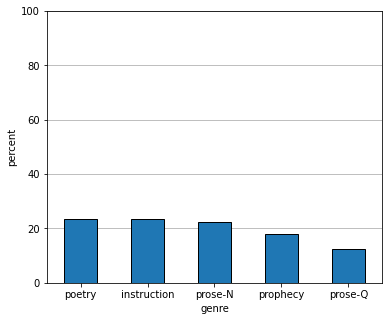

In [56]:
fig, ax = plt.subplots(figsize=(6, 5))

data = regrec_gen_pr.mul(100)
data.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
out.plot(
    'bar_regrec_genre'
)

In [57]:
ts.show(

regrec[
    (regrec.main_genre == 'prose-N')
]
)

showing 16 of 16


,verse,clause
node,,
431998,Genesis 39:10,כְּדַבְּרָ֥הּ אֶל־יֹוסֵ֖ף יֹ֣ום׀ יֹ֑ום
435342,Exodus 16:21,וַיִּלְקְט֤וּ אֹתֹו֙ בַּבֹּ֣קֶר בַּבֹּ֔קֶר
435580,Exodus 18:26,וְשָׁפְט֥וּ אֶת־הָעָ֖ם בְּכָל־עֵ֑ת
453963,1_Samuel 1:7,וְכֵ֨ן יַעֲשֶׂ֜ה שָׁנָ֣ה בְשָׁנָ֗ה
454685,1_Samuel 7:16,וְהָלַ֗ךְ מִדֵּ֤י שָׁנָה֙ בְּשָׁנָ֔ה
461798,1_Kings 5:2,וַיְהִ֥י לֶֽחֶם־שְׁלֹמֹ֖ה לְיֹ֣ום אֶחָ֑ד שְׁלֹשִׁ֥ים כֹּר֙ סֹ֔לֶת וְשִׁשִּׁ֥ים כֹּ֖ר קָֽמַח׃
461882,1_Kings 5:25,כֹּֽה־יִתֵּ֧ן שְׁלֹמֹ֛ה לְחִירָ֖ם שָׁנָ֥ה בְשָׁנָֽה׃ פ
505372,Esther 2:11,וּבְכָל־יֹ֣ום וָיֹ֔ום מָרְדֳּכַי֙ מִתְהַלֵּ֔ךְ לִפְנֵ֖י חֲצַ֣ר בֵּית־הַנָּשִׁ֑ים
505438,Esther 3:4,כְּאָמְרָ֤ם אֵלָיו֙ יֹ֣ום וָיֹ֔ום


In [58]:
ts.show(

regrec[
    (regrec.main_genre == 'poetry')
    & (regrec.reg_group == 'ב.כל.זמן')
]
)

showing 11 of 11


,verse,clause
node,,
490396,Psalms 6:7,אַשְׂחֶ֣ה בְכָל־לַ֭יְלָה מִטָּתִ֑י
491664,Psalms 34:2,אֲבָרֲכָ֣ה אֶת־יְהוָ֣ה בְּכָל־עֵ֑ת
493150,Psalms 62:9,בִּטְח֘וּ בֹ֤ו בְכָל־עֵ֨ת׀
494601,Psalms 88:10,קְרָאתִ֣יךָ בְּכָל־יֹ֑ום
495538,Psalms 106:3,עֹשֵׂ֖ה צְדָקָ֣ה בְכָל־עֵֽת׃
496197,Psalms 119:20,גָּרְסָ֣ה נַפְשִׁ֣י לְתַאֲבָ֑ה אֶֽל־מִשְׁפָּטֶ֥יךָ בְכָל־עֵֽת׃
497087,Psalms 140:3,כָּל־יֹ֝֗ום יָג֥וּרוּ מִלְחָמֹֽות׃
497294,Psalms 145:2,בְּכָל־יֹ֥ום אֲבָרֲכֶ֑ךָּ
500820,Proverbs 6:14,חֹרֵ֣שׁ רָ֣ע בְּכָל־עֵ֑ת


## Atelic Extent

In [59]:
atel_df = df[df.function == 'atelic_ext']

atel_df.shape

(578, 81)

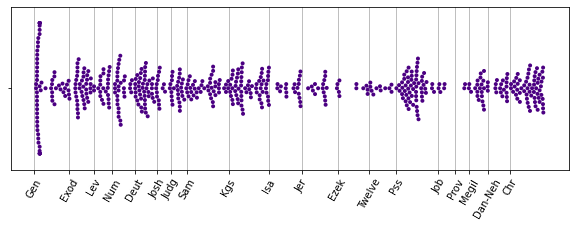

In [60]:
plot_distrib(atel_df)

out.plot(
    'distrib_atelext'
)

In [61]:
gen5 =  atel_df[atel_df.verse.str.startswith('Genesis 5:')]

out.number(
    gen5.shape[0],
    'atelext_gen5'
)

'17'

In [62]:
ts.show(
   gen5, spread=10
)

showing 10 of 17


,verse,clause
node,,
427984,Genesis 5:3,וַֽיְחִ֣י אָדָ֗ם שְׁלֹשִׁ֤ים וּמְאַת֙ שָׁנָ֔ה
427995,Genesis 5:7,וַֽיְחִי־שֵׁ֗ת שֶׁ֣בַע שָׁנִ֔ים וּשְׁמֹנֶ֥ה מֵאֹ֖ות שָׁנָ֑ה
428002,Genesis 5:10,וַֽיְחִ֣י אֱנֹ֗ושׁ חֲמֵ֤שׁ עֶשְׂרֵה֙ שָׁנָ֔ה וּשְׁמֹנֶ֥ה מֵאֹ֖ות שָׁנָ֑ה
428009,Genesis 5:13,וַיְחִ֣י קֵינָ֗ן אַרְבָּעִ֣ים שָׁנָ֔ה וּשְׁמֹנֶ֥ה מֵאֹ֖ות שָׁנָ֑ה
428016,Genesis 5:16,וַֽיְחִ֣י מַֽהֲלַלְאֵ֗ל שְׁלֹשִׁ֣ים שָׁנָ֔ה וּשְׁמֹנֶ֥ה מֵאֹ֖ות שָׁנָ֑ה
428021,Genesis 5:18,וַֽיְחִי־יֶ֕רֶד שְׁתַּ֧יִם וְשִׁשִּׁ֛ים שָׁנָ֖ה וּמְאַ֣ת שָׁנָ֑ה
428028,Genesis 5:21,וַֽיְחִ֣י חֲנֹ֔וךְ חָמֵ֥שׁ וְשִׁשִּׁ֖ים שָׁנָ֑ה
428037,Genesis 5:25,וַיְחִ֣י מְתוּשֶׁ֔לַח שֶׁ֧בַע וּשְׁמֹנִ֛ים שָׁנָ֖ה וּמְאַ֣ת שָׁנָ֑ה
428044,Genesis 5:28,וַֽיְחִי־לֶ֕מֶךְ שְׁתַּ֧יִם וּשְׁמֹנִ֛ים שָׁנָ֖ה וּמְאַ֣ת שָׁנָ֑ה


In [63]:
atelext_gen_ct = atel_df.main_genre.value_counts()
atelext_gen_pr = atelext_gen_ct / atelext_gen_ct.sum()
atelext_gen_cp = join_ct_pr(atelext_gen_ct, atelext_gen_pr)

out.table(
    atelext_gen_cp,
    'atelext_gen_cp',
    caption='Genre Counts for Atelic Extent',
)

,count,percent
prose-N,215,41%
prose-Q,106,20%
poetry,80,15%
instruction,69,13%
prophecy,52,10%


In [64]:
out.number(
    atelext_gen_pr['prose-N']*100,
    'atelext_proseN_pc'
)

'41'

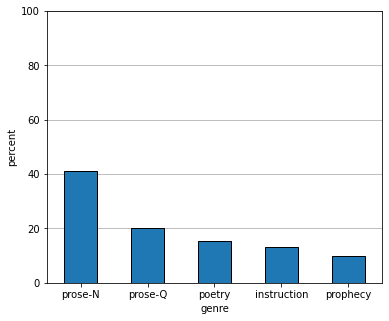

In [65]:
fig, ax = plt.subplots(figsize=(6, 5))
data = atelext_gen_pr.mul(100)
data.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
out.plot(
    'bar_atelext_genre'
)

In [66]:
ts.show(
    atel_df[
        (atel_df.verbform == 'wayq')
        & (atel_df.main_genre == 'prose-N')
    ]
)

showing 25 of 118


,verse,clause
node,,
428160,Genesis 7:12,וַֽיְהִ֥י הַגֶּ֖שֶׁם עַל־הָאָ֑רֶץ אַרְבָּעִ֣ים יֹ֔ום וְאַרְבָּעִ֖ים לָֽיְלָה׃
428449,Genesis 11:11,וַֽיְחִי־שֵׁ֗ם חֲמֵ֥שׁ מֵאֹ֖ות שָׁנָ֑ה
428467,Genesis 11:18,וַֽיְחִי־פֶ֖לֶג שְׁלֹשִׁ֣ים שָׁנָ֑ה
428479,Genesis 11:23,וַיְחִ֣י שְׂר֗וּג מָאתַ֣יִם שָׁנָ֑ה
430602,Genesis 29:14,וַיֵּ֥שֶׁב עִמֹּ֖ו חֹ֥דֶשׁ יָמִֽים׃
432418,Genesis 42:17,וַיֶּאֱסֹ֥ף אֹתָ֛ם אֶל־מִשְׁמָ֖ר שְׁלֹ֥שֶׁת יָמִֽים׃
433617,Exodus 2:2,וַֽתִּצְפְּנֵ֖הוּ שְׁלֹשָׁ֥ה יְרָחִֽים׃
436180,Exodus 24:18,וַיְהִ֤י מֹשֶׁה֙ בָּהָ֔ר אַרְבָּעִ֣ים יֹ֔ום וְאַרְבָּעִ֖ים לָֽיְלָה׃ פ
448715,Deuteronomy 34:8,וַיִּבְכּוּ֩ בְנֵ֨י יִשְׂרָאֵ֧ל אֶת־מֹשֶׁ֛ה בְּעַֽרְבֹ֥ת מֹואָ֖ב שְׁלֹשִׁ֣ים יֹ֑ום


In [67]:
# count verb forms to demo Hatav's point about TAs a binding states

atelext_verb_ct = atel_df.verbform.value_counts()
atelext_verb_pr = atelext_verb_ct / atelext_verb_ct.sum()
atelext_verb_cp = join_ct_pr(atelext_verb_ct, atelext_verb_pr)

out.table(
    atelext_verb_cp.drop(['infc', 'infa']),
    'atelext_verb_cp',
    caption='Verb Forms Attested with Atelic Extent'
)

,count,percent
wayq,155,27%
yqtl,130,22%
qtl,120,21%
Ø,59,10%
wqtl,46,8%
ptcp,20,3%
impv,10,2%
cohoF,2,0%
jussF,1,0%


In [68]:
out.number(
    atelext_verb_pr['wayq']*100,
    'atelext_wayq_pc'
)

'27'

## Telic Extent

In [69]:
tel_df = df[df.function == 'telic_ext']
tel_df.shape

(14, 81)

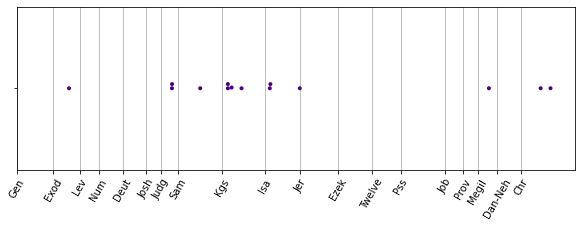

In [70]:
plot_distrib(tel_df)
out.plot('distrib_telext')

In [71]:
telext_gen_ct = tel_df.main_genre.value_counts()
telext_gen_pr = telext_gen_ct / telext_gen_ct.sum()
telext_gen_cp = join_ct_pr(telext_gen_ct, telext_gen_pr)

out.table(
    telext_gen_cp,
    'telext_gen_cp',
    caption='Genre Counts for Telic Extent',
)

,count,percent
prose-N,6,46%
prophecy,3,23%
prose-Q,2,15%
poetry,1,8%
instruction,1,8%


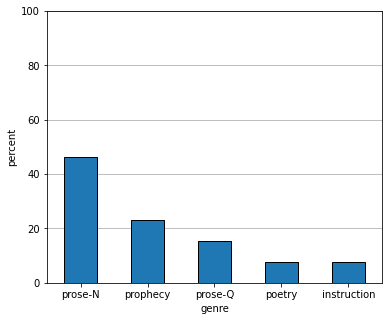

In [72]:
fig, ax = plt.subplots(figsize=(6, 5))
data = telext_gen_pr.mul(100)
data.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
out.plot(
    'bar_telext_genre'
)

## Purposive Extent

In [73]:
purpextdf = df[df.function == 'purposive_ext']
purpextdf.shape

(34, 81)

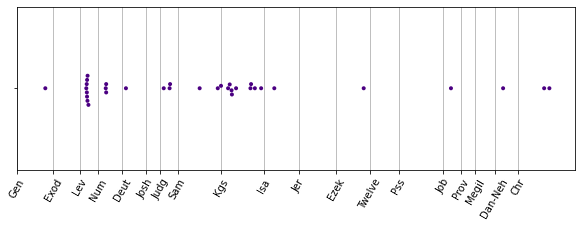

In [74]:
plot_distrib(purpextdf)
#out.plot('distrib_purpext')

In [75]:
ts.show(
    purpextdf[purpextdf.book == 'Leviticus']
)

showing 8 of 8


,verse,clause
node,,
438983,Leviticus 13:5,וְהִסְגִּירֹ֧ו הַכֹּהֵ֛ן שִׁבְעַ֥ת יָמִ֖ים שֵׁנִֽית׃
439051,Leviticus 13:21,וְהִסְגִּירֹ֥ו הַכֹּהֵ֖ן שִׁבְעַ֥ת יָמִֽים׃
439075,Leviticus 13:26,וְהִסְגִּירֹ֥ו הַכֹּהֵ֖ן שִׁבְעַ֥ת יָמִֽים׃
439099,Leviticus 13:31,וְהִסְגִּ֧יר הַכֹּהֵ֛ן אֶת־נֶ֥גַע הַנֶּ֖תֶק שִׁבְעַ֥ת יָמִֽים׃
439107,Leviticus 13:33,וְהִסְגִּ֨יר הַכֹּהֵ֧ן אֶת־הַנֶּ֛תֶק שִׁבְעַ֥ת יָמִ֖ים שֵׁנִֽית׃
439171,Leviticus 13:50,וְהִסְגִּ֥יר אֶת־הַנֶּ֖גַע שִׁבְעַ֥ת יָמִֽים׃
439187,Leviticus 13:54,וְהִסְגִּירֹ֥ו שִׁבְעַת־יָמִ֖ים שֵׁנִֽית׃
439332,Leviticus 14:38,וְהִסְגִּ֥יר אֶת־הַבַּ֖יִת שִׁבְעַ֥ת יָמִֽים׃


## Begin to End

In [90]:
b2edf = df[df.function.str.contains('begin_to_end')]
b2edf.shape

(67, 81)

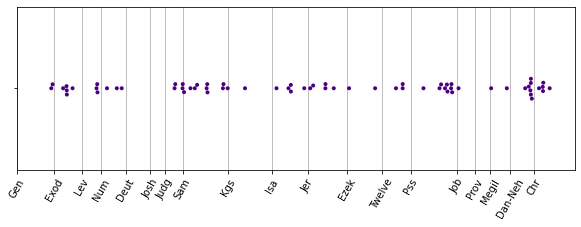

In [91]:
plot_distrib(b2edf)
out.plot('distrib_begintoend')

In [92]:
b2e_gen_ct = b2edf.main_genre.value_counts()
b2e_gen_pr = b2e_gen_ct / b2e_gen_ct.sum()
b2e_gen_cp = join_ct_pr(b2e_gen_ct, b2e_gen_pr)

out.table(
    b2e_gen_cp,
    'b2e_gen_cp',
    caption='Genre Counts for Begin-to-End',
)

,count,percent
prose-N,16,25%
prose-Q,16,25%
prophecy,15,24%
poetry,11,17%
instruction,5,8%


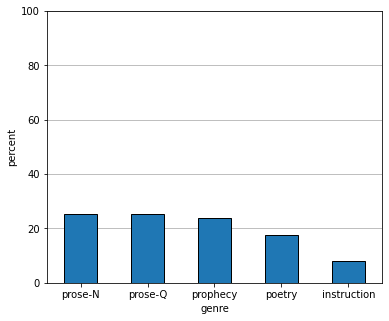

In [93]:
fig, ax = plt.subplots(figsize=(6, 5))
data = b2e_gen_pr.mul(100)
data.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
out.plot(
    'bar_b2e_genre'
)

## Calendricals

In [94]:
caldf = df[df.function.str.contains('simultaneous_calendar')]
caldf.shape

(65, 81)

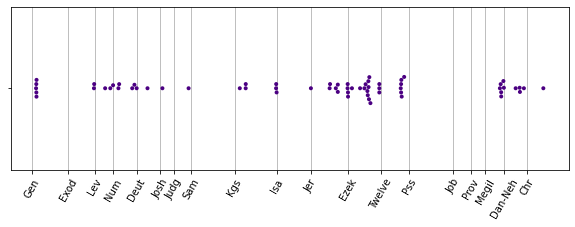

In [95]:
plot_distrib(caldf)
out.plot('distrib_calendrical')

In [88]:
ts.show(
    caldf[caldf.book == 'Ezekiel']
)

showing 15 of 15


,verse,clause
node,,
480003,Ezekiel 1:1,וַיְהִ֣י׀ בִּשְׁלֹשִׁ֣ים שָׁנָ֗ה בָּֽרְבִיעִי֙ בַּחֲמִשָּׁ֣ה לַחֹ֔דֶשׁ
480655,Ezekiel 8:1,וַיְהִ֣י׀ בַּשָּׁנָ֣ה הַשִּׁשִּׁ֗ית בַּשִּׁשִּׁי֙ בַּחֲמִשָּׁ֣ה לַחֹ֔דֶשׁ
482007,Ezekiel 20:1,וַיְהִ֣י׀ בַּשָּׁנָ֣ה הַשְּׁבִיעִ֗ית בַּֽחֲמִשִׁי֙ בֶּעָשֹׂ֣ור לַחֹ֔דֶשׁ
482726,Ezekiel 24:1,וַיְהִי֩ דְבַר־יְהוָ֨ה אֵלַ֜י בַּשָּׁנָ֤ה הַתְּשִׁיעִית֙ בַּחֹ֣דֶשׁ הָעֲשִׂירִ֔י בֶּעָשֹׂ֥ור לַחֹ֖דֶשׁ
482924,Ezekiel 26:1,וַיְהִ֛י בְּעַשְׁתֵּֽי־עֶשְׂרֵ֥ה שָׁנָ֖ה בְּאֶחָ֣ד לַחֹ֑דֶשׁ
483224,Ezekiel 29:1,בַּשָּׁנָה֙ הָעֲשִׂירִ֔ית בָּעֲשִׂרִ֕י בִּשְׁנֵ֥ים עָשָׂ֖ר לַחֹ֑דֶשׁ
483292,Ezekiel 29:17,וַיְהִ֗י בְּעֶשְׂרִ֤ים וָשֶׁ֨בַע֙ שָׁנָ֔ה בָּֽרִאשֹׁ֖ון בְּאֶחָ֣ד לַחֹ֑דֶשׁ
483384,Ezekiel 30:20,וַיְהִ֗י בְּאַחַ֤ת עֶשְׂרֵה֙ שָׁנָ֔ה בָּֽרִאשֹׁ֖ון בְּשִׁבְעָ֣ה לַחֹ֑דֶשׁ
483417,Ezekiel 31:1,וַיְהִ֗י בְּאַחַ֤ת עֶשְׂרֵה֙ שָׁנָ֔ה בַּשְּׁלִישִׁ֖י בְּאֶחָ֣ד לַחֹ֑דֶשׁ


In [96]:
cal_gen_ct = caldf.main_genre.value_counts()
cal_gen_pr = cal_gen_ct / cal_gen_ct.sum()
cal_gen_cp = join_ct_pr(cal_gen_ct, cal_gen_pr)

out.table(
    cal_gen_cp,
    'cal_gen_cp',
    caption='Genre Counts for Coordinated Calendricals',
)

,count,percent
prose-N,30,55%
prophecy,16,29%
instruction,9,16%


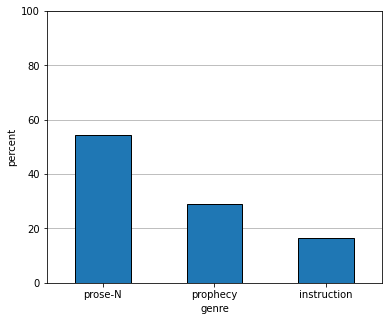

In [98]:
fig, ax = plt.subplots(figsize=(6, 5))
data = cal_gen_pr.mul(100)
data.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_ylabel('percent')
ax.set_xlabel('genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0, 100)
out.plot(
    'bar_cal_genre'
)

# Function by Genre

In [78]:
genre_ct = pivot_ct(
    df[
        (df.funct_type=='main')
        & (df.genre.isin(['prose', 'instruction', 'poetry', 'prophetic']))
        & (df.domain.isin(['Q', 'N']))
    ],
    ['function'],
    ['main_genre']
)

genre_ct

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,702,456,335,159,122
atelic_ext,106,199,49,79,65
anterior_dur,107,71,67,111,54
posterior,30,106,22,8,22
reg_recur,9,14,11,17,17
posterior_dur,13,7,38,3,5
anterior,9,13,1,4,0
telic_ext,2,6,3,1,1
dist_fut,4,0,2,0,0


In [79]:
genre_pr = genre_ct.div(genre_ct.sum(1), 0)
genre_pr2 = genre_ct.T.div(genre_ct.T.sum(1), 0)
genre_pr

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,0.395716,0.257046,0.188839,0.089628,0.068771
atelic_ext,0.212851,0.399598,0.098394,0.158635,0.130522
anterior_dur,0.260976,0.173171,0.163415,0.270732,0.131707
posterior,0.159574,0.563830,0.117021,0.042553,0.117021
reg_recur,0.132353,0.205882,0.161765,0.250000,0.250000
posterior_dur,0.196970,0.106061,0.575758,0.045455,0.075758
anterior,0.333333,0.481481,0.037037,0.148148,0.000000
telic_ext,0.153846,0.461538,0.230769,0.076923,0.076923
dist_fut,0.666667,0.000000,0.333333,0.000000,0.000000


### ΔP tests for genre

In [80]:
genre_dp = sig.apply_deltaP(genre_ct, 0, 1)
genre_dp2 = sig.apply_deltaP(genre_ct.T, 0, 1)

genre_dp

main_genre,prose-Q,prose-N,prophecy,poetry,instruction
function,,,,,
simultaneous,0.174449,-0.068208,0.037940,-0.084727,-0.059454
atelic_ext,-0.131180,0.136193,-0.089082,0.040044,0.044025
anterior_dur,-0.071223,-0.129894,-0.011008,0.168197,0.043928
posterior,-0.173759,0.296465,-0.059593,-0.087988,0.024875
reg_recur,-0.194615,-0.081555,-0.011435,0.127722,0.159883
posterior_dur,-0.128440,-0.183528,0.411713,-0.081429,-0.018317
anterior,0.010795,0.197608,-0.137120,0.023231,-0.094514
telic_ext,-0.169509,0.176670,0.058072,-0.048406,-0.016827
dist_fut,0.344711,-0.286183,0.160705,-0.125369,-0.093863


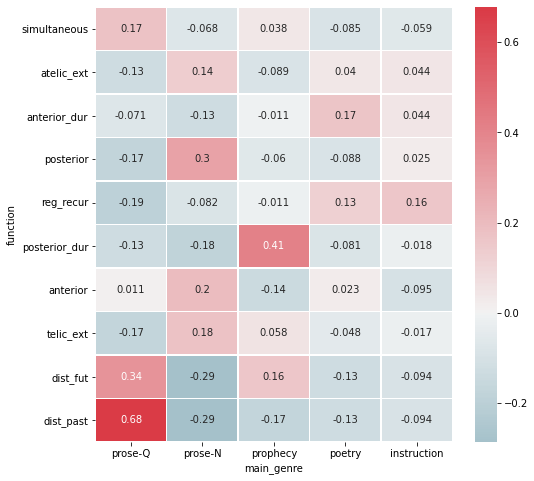

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))
heatmap(genre_dp, annot=True, square=False)
out.plot(
    'heat_afgenre_dp',
)

## Fishers

In [21]:
genre_fs, genre_odds = sig.apply_fishers(genre_ct, 0, 1)

In [22]:
genre_fs

,prose-Q,prose-N,prophecy,poetry,instruction
simultaneous,22.749722,-4.079710,1.828135,-10.135284,-7.410301
atelic_ext,-8.566858,8.320168,-6.414863,2.247389,2.636964
anterior_dur,-2.578228,-7.446766,-0.239902,18.145225,2.225082
posterior,-6.475378,15.595433,-1.533743,-3.853535,0.608283
posterior_dur,-1.813527,-3.118026,13.199064,-1.251289,-0.081093
habitual,-1.857086,-0.058301,0.239152,0.000000,3.337814
anterior,0.782534,-0.114144,-0.312607,0.396238,-0.198053
telic_ext,-0.612936,0.671113,0.315122,0.000000,0.000000
dist_fut,1.035446,-0.714878,0.549952,0.000000,0.000000
dist_past,1.464118,-0.249483,0.000000,0.000000,0.000000


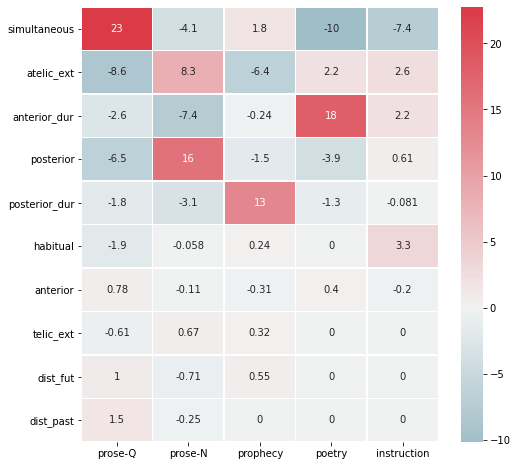

In [23]:
afig, ax = plt.subplots(figsize=(8, 8))
heatmap(genre_fs, annot=True, square=False)